In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
image = cv2.imread('Laplace.png', -1)
image.shape

(1200, 746)

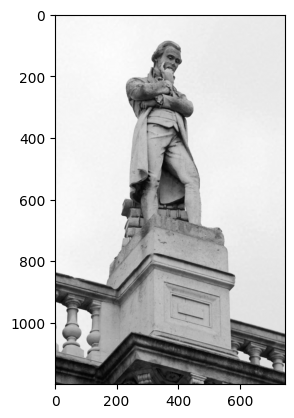

In [27]:
plt.imshow(image, cmap='gray')

#### Laplacian Filtering

In [33]:
def myconv(image, kernel):
    m = kernel.shape[0]
    pad = m // 2
    
    img_pad = np.pad(image.astype(np.float32), pad_width=pad, mode='constant')
    out = np.zeros_like(image, dtype=np.float32)

    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            region = img_pad[i:i+m, j:j+m]
            out[i, j] = np.sum(region * kernel)
    return out 

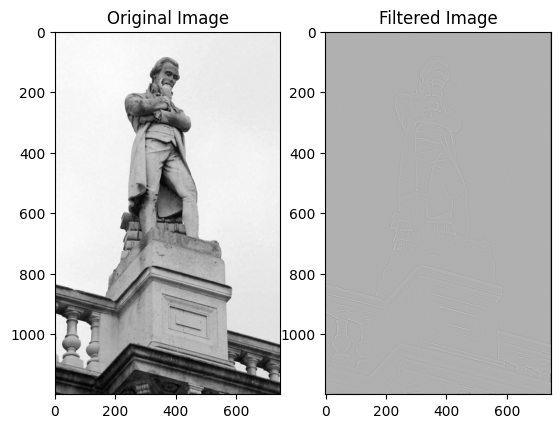

In [34]:
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])


lap = myconv(image, kernel)

lap_norm = cv2.normalize(lap, None, 0, 255, cv2.NORM_MINMAX)
lap_norm = lap_norm.astype(np.uint8)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(lap_norm, cmap='gray')

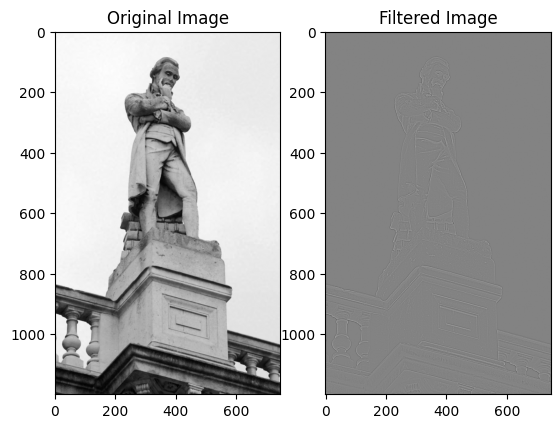

In [30]:
#Using opencv
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

lap = cv2.filter2D(src = image.astype(np.float32), ddepth = cv2.CV_32F, kernel = kernel)
lap_norm = cv2.normalize(lap, None, 0, 255, cv2.NORM_MINMAX)
lap_norm = lap_norm.astype(np.uint8)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(lap_norm, cmap='gray')